# Explore here

In [38]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data.drop(columns = ["id"], inplace = True)
total_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
# Obtener las dimensiones
total_data.shape

(48895, 15)

In [40]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

Se puede observar arriba que algunas columnas contienen valores NaN, siendo "last_review" y "reviews_per_month" las que más.

Asimismo, nos informa de lo siguiente:
- Hay 8 características categóricas (id, name,
host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365).

- Y 8 características numéricas (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count).

In [41]:
#Contar el número de duplicados

print(f"El número total de repetidos en la columna Name es: {total_data['name'].duplicated().sum()}")
print(f"El número total de repetidos en la columna Host_id es: {total_data['host_id'].duplicated().sum()}")

El número total de repetidos en la columna Name es: 989
El número total de repetidos en la columna Host_id es: 11438


Hay varios duplicados en el nombre porque puede coincidir que algunas personas asignen el mismo título al anuncio.
En el caso de host_id se debe a que varios propietarios tienen más de una vivienda.

In [42]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(48895, 15)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [43]:
#Eliminar información irrelevante

total_data.drop(["name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


/tmp/ipykernel_2498/1641109454.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_2498/1641109454.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


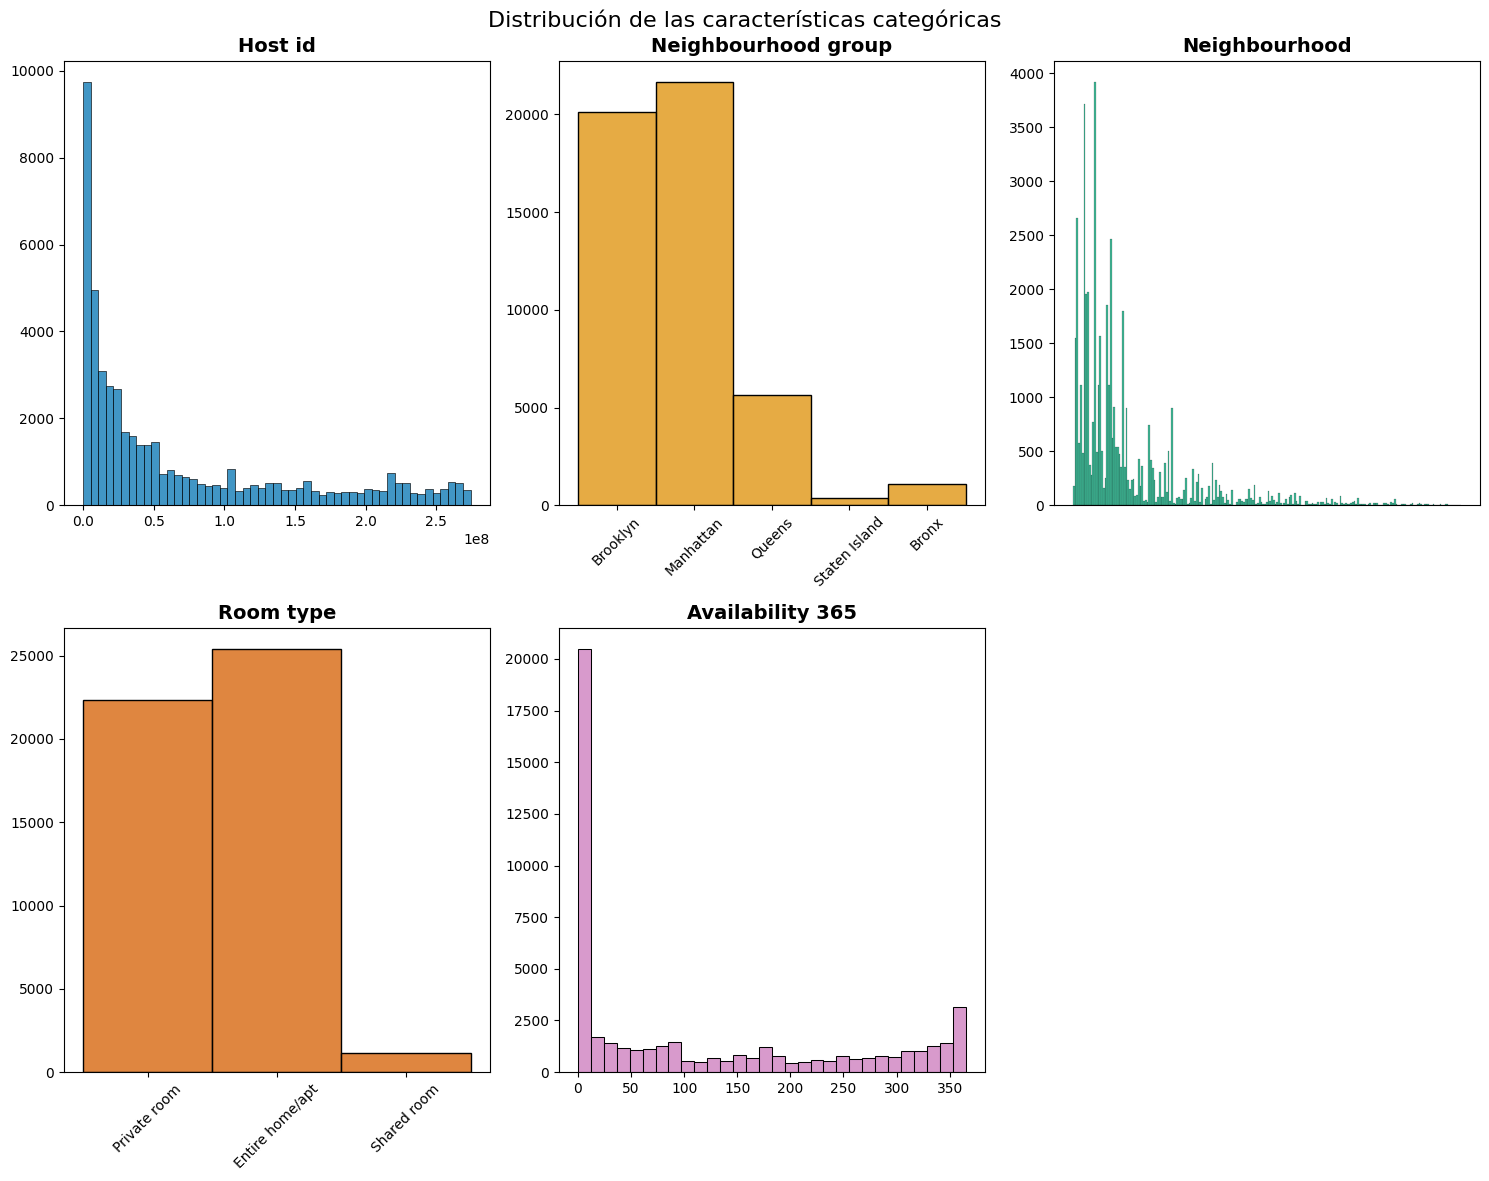

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle("Distribución de las características categóricas", fontsize=16)

categorias = [
    ("host_id", 0, 0),
    ("neighbourhood_group", 0, 1),
    ("neighbourhood", 0, 2),
    ("room_type", 1, 0),
    ("availability_365", 1, 1),
]
colores = sns.color_palette("colorblind")

for i, (col, row, col_pos) in enumerate(categorias):
    ax = axis[row, col_pos]
    sns.histplot(data=total_data, x=col, ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=14, fontweight='bold')
    
    if col in ["neighbourhood_group", "room_type"]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    if col == "neighbourhood":
        ax.set_xticks([])

fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()

Se puede observar lo siguiente:

- Host_id: hay muchos propietarios con muchas habitaciones en alquiler.
- Neighbourhood_group: aparecen cinco areas: Brooklyn, Manhattan, Queens, Staten Island y el Bronx, siendo las dos primeras las que más viviendas para alquilar hay.
- Neighbourhood: se ve una gran diferencia de ciertas zonas frente a otras.
- Room_type: el tipo de vivienda que predomina es el apartamento entero, seguido de las habitaciones privadas y por último, las habitaciones compartidas.
- Availability_365: la mayoría tiene una disponibilidad de 365 días, pero falta información por el gran número de NaN.

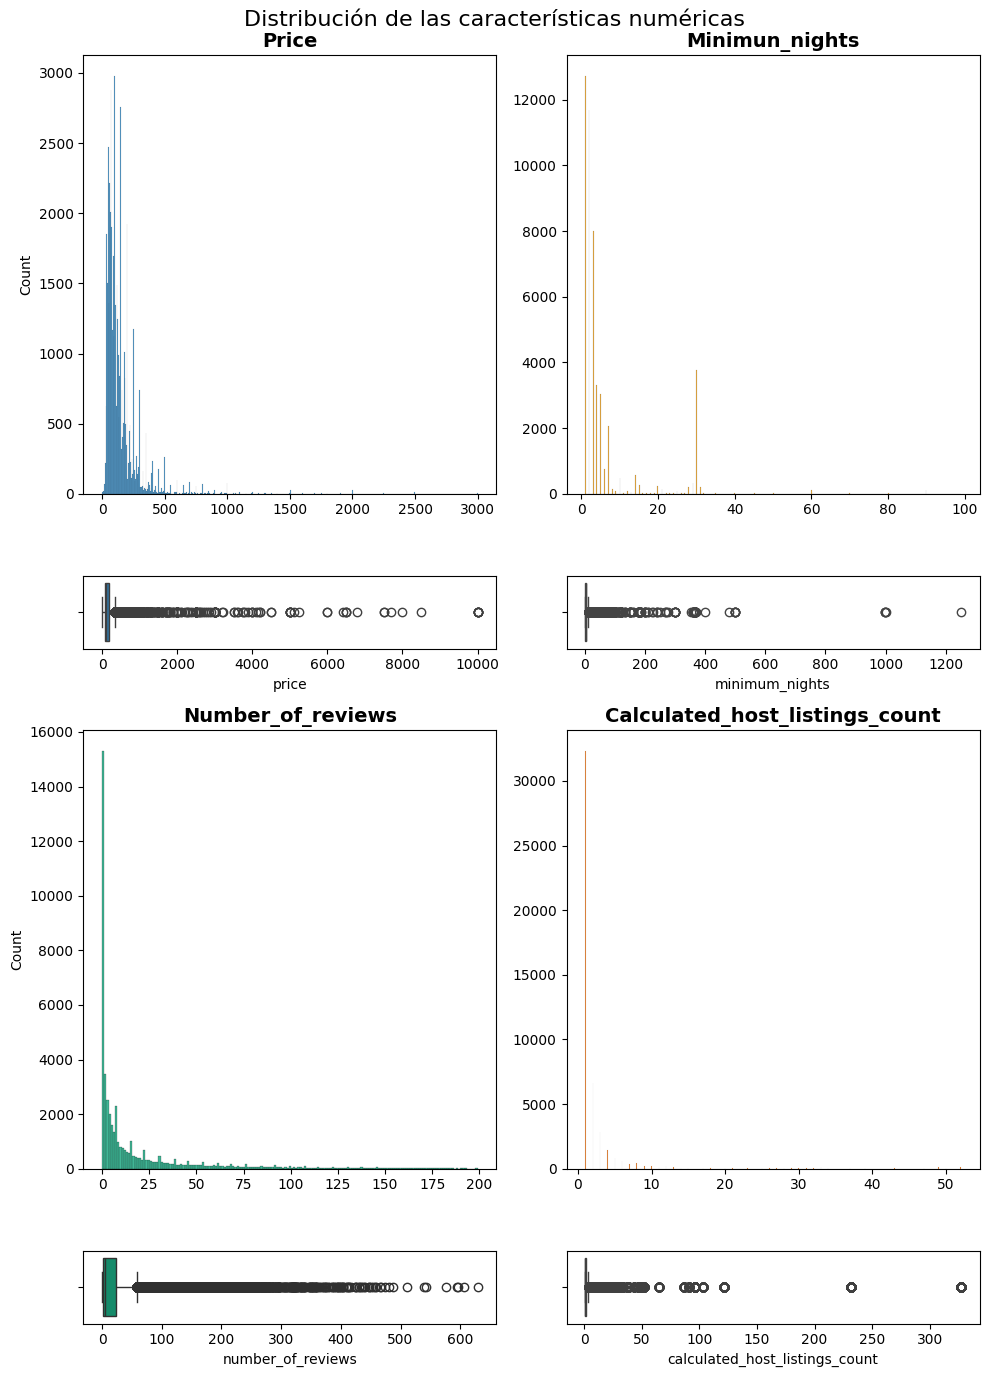

In [45]:
#Analisis con histogramas y boxplot de las características numéricas

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = total_data[total_data["price"] < 3000], x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data[total_data["minimum_nights"] < 100], x = "minimum_nights", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[2, 0], data = total_data[total_data["number_of_reviews"] < 200], x = "number_of_reviews", color=sns.color_palette("colorblind")[2]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[2,1], data = total_data[total_data["calculated_host_listings_count"] < 60], x = "calculated_host_listings_count", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count", color=sns.color_palette("colorblind")[3])

axis[0, 0].set_title("Price", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Minimun_nights", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Number_of_reviews", fontsize=14, fontweight='bold')
axis[2, 1].set_title("Calculated_host_listings_count", fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

Se puede observar lo siguiente:

- Price: los precios de la mayoría de los AirBnb rondan de los 100 a los 500.
- Minimum_nights: la estancia mínima está entre 5 a 30 noches, pero falta información por el alto número de NaN.
- Number_of_reviews: igual que en el caso anterior, no hay mucha información. Pero se ve que la mayoría tiene pocas opiniones de usuarios.
- Calculated_host_listings_count: no hay muchos datos sobre esta columna.

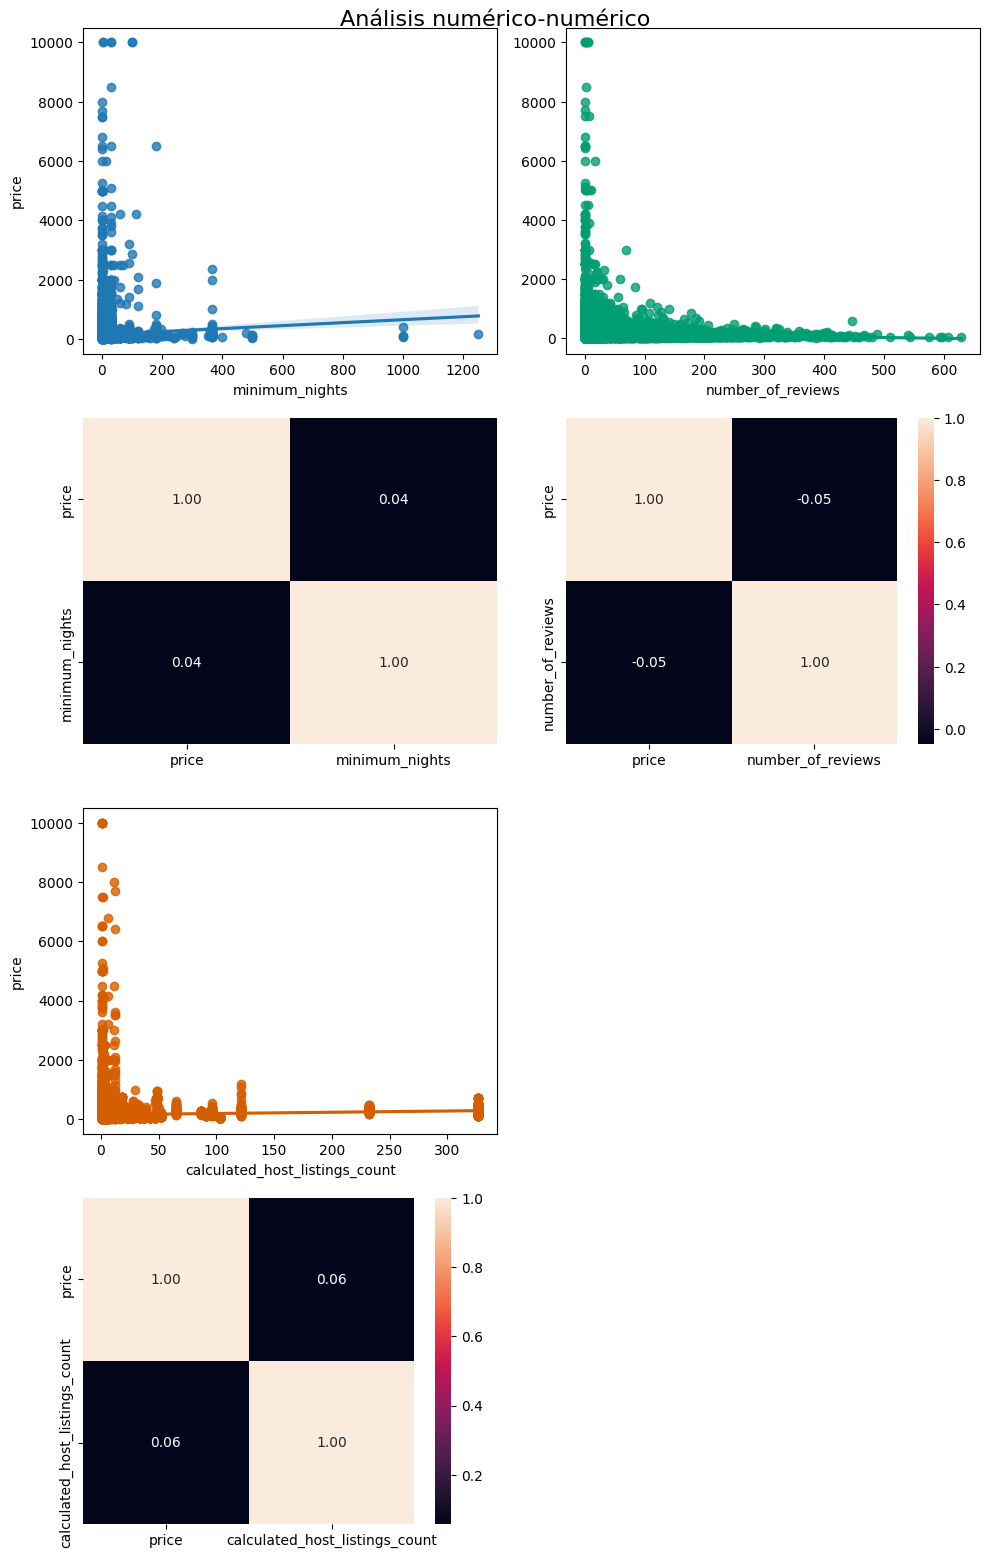

In [46]:
#Analisis de varias variables

fig, axis = plt.subplots(4, 2, figsize = (10, 16))
fig.suptitle("Análisis numérico-numérico", fontsize=16)

 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price", color=sns.color_palette("colorblind")[3])
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

Después de ver los gráficos anteriores, se puede concluir que en ambos caso no existe relación entre el precio y el número mínimo de noches, y el número de opiniones y el precio.

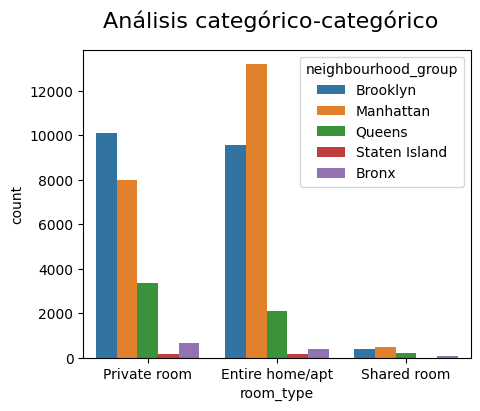

In [47]:
#Analisis de varias variables, pt.2

fig, axis = plt.subplots(figsize = (5, 4))
fig.suptitle("Análisis categórico-categórico", fontsize=16)

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

plt.show()

De la gráfica anterior podemos deducir lo siguiente:

- Manhattan es el vecindario donde más apartamentos enteros hay para alquilar.
- Brooklyn es el segundo barrio en el que más se puede alquilar, sin embargo, predominan las habitaciones privadas.
- Queens y el Bronx son los siguientes grupos, y el tipo de habitación que destaca es el mismo que Brooklyn.
- Staten Island apenas tiene visibilización, por lo que el alquiler en esta zona no es muy común. 

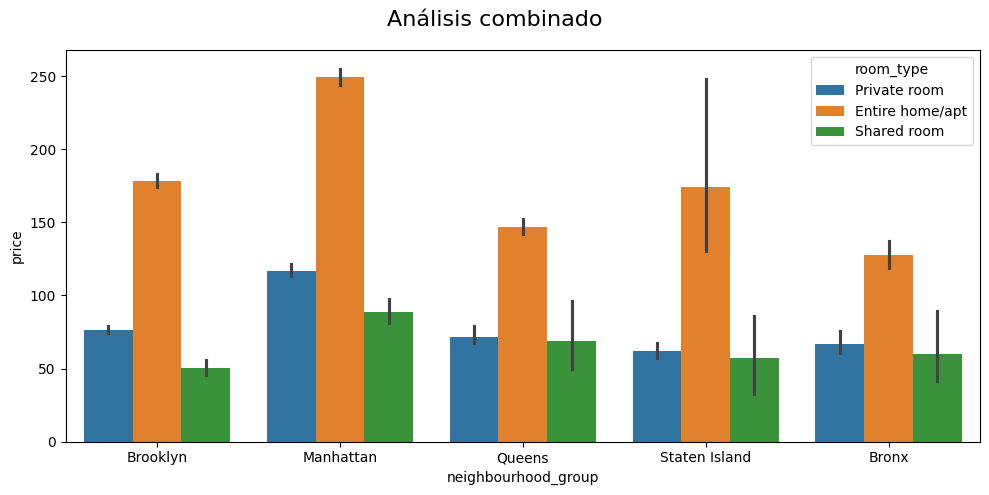

In [48]:
#Análisis combinando varias variables

fig, axis = plt.subplots(figsize = (10, 5))
fig.suptitle("Análisis combinado", fontsize=16)

sns.barplot(data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.tight_layout()

plt.show()

De la comparativa entre el precio, el vecindario y el tipo de habitación se puede observar:

- Manhattan tiene los precios más altos: En general, Manhattan muestra los precios promedio más altos, especialmente para la categoría de Entire home. Por lo que alojarse en una casa completa aquí es más caro que en otras áreas.

- Los precios más bajos en el Bronx y Staten Island: tienen los precios promedio más bajos para los tres tipos de alojamiento. Esto indica que estos son los lugares más económicos para quedarse.

- Diferencias de precio según tipo de alojamiento:

    - Entire home/apt es el tipo de alojamiento más caro en todas las áreas, destacando especialmente en Manhattan.
    - Private room es más asequible que el anterior, pero sigue siendo superior a  Shared room en todas las zonas.
    - Shared room es el tipo de alojamiento más económico en cada zona, destacando el Bronx y Staten Island.

En general, el gráfico sugiere que la zona y el tipo de alojamiento son factores importantes que afectan el precio de hospedaje en Nueva York.


In [49]:
import json

ng = list(total_data['neighbourhood_group'].unique())
neighbourhood_group_encoded = dict(zip(ng, list(range(len(ng)))))

with open('./enc/neighbourhood_group_encoded.json', 'w') as f:
    json.dump(neighbourhood_group_encoded, f)

In [50]:
n = list(total_data['neighbourhood'].unique())
neighbourhood_encoded = dict(zip(n, list(range(len(n)))))

with open('./enc/neighbourhood_encoded.json', 'w') as f:
    json.dump(neighbourhood_encoded, f)

In [51]:
rt = list(total_data['room_type'].unique())
room_type_encoded = dict(zip(rt, list(range(len(rt)))))

with open('./enc/room_type_encoded.json', 'w') as f:
    json.dump(room_type_encoded, f)

In [52]:
df_enc = total_data.copy()

In [53]:
df_enc['neighbourhood_group_encoded'] = df_enc['neighbourhood_group'].map(neighbourhood_group_encoded)
df_enc['neighbourhood_encoded'] = df_enc['neighbourhood'].map(neighbourhood_encoded)
df_enc['room_type_encoded'] = df_enc['room_type'].map(room_type_encoded)
df_enc.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type'], inplace=True)
df_enc.head(3)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,neighbourhood_encoded,room_type_encoded
0,2787,40.64749,-73.97237,149,1,9,6,365,0,0,0
1,2845,40.75362,-73.98377,225,1,45,2,355,1,1,1
2,4632,40.80902,-73.94190,150,3,0,1,365,1,2,0


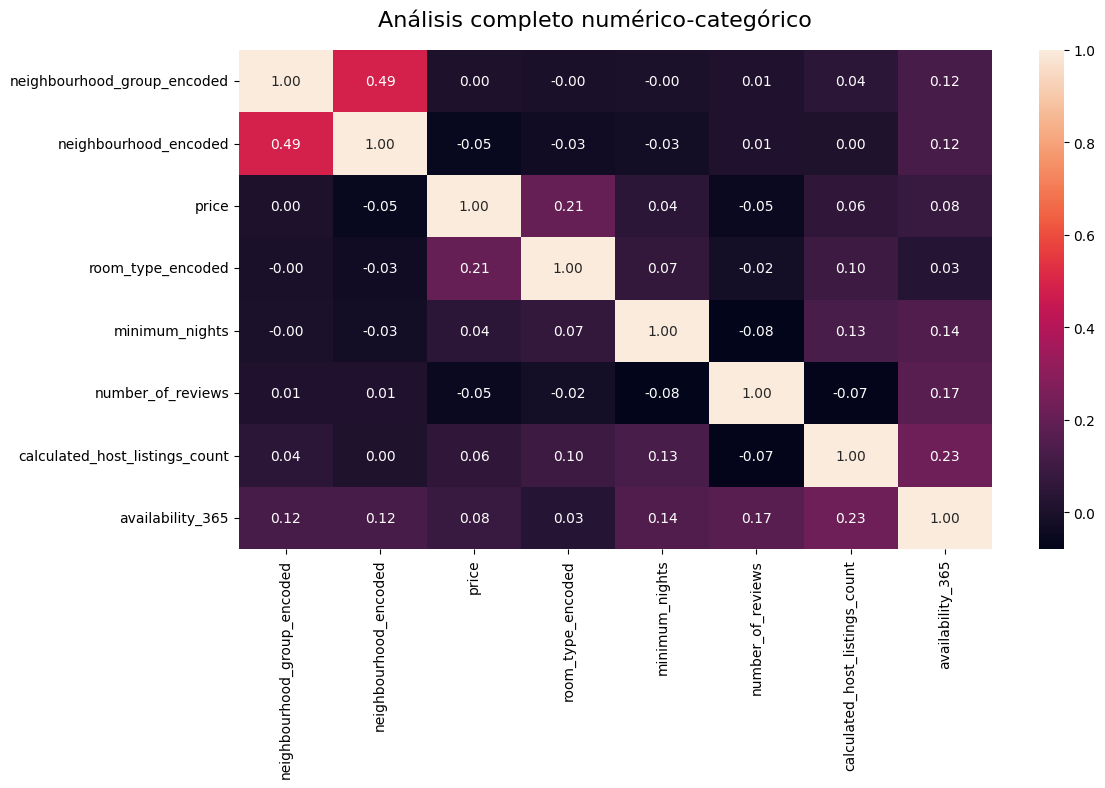

In [54]:
fig, axis = plt.subplots(figsize = (12, 8))
fig.suptitle("Análisis completo numérico-categórico", fontsize=16)

sns.heatmap(df_enc[["neighbourhood_group_encoded", "neighbourhood_encoded", "price", "room_type_encoded", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis entre todas las categorías es:

- Los anfitriones con más listados tienden a tener mayor disponibilidad.
- Dependiendo del vecindario, los precios varían.

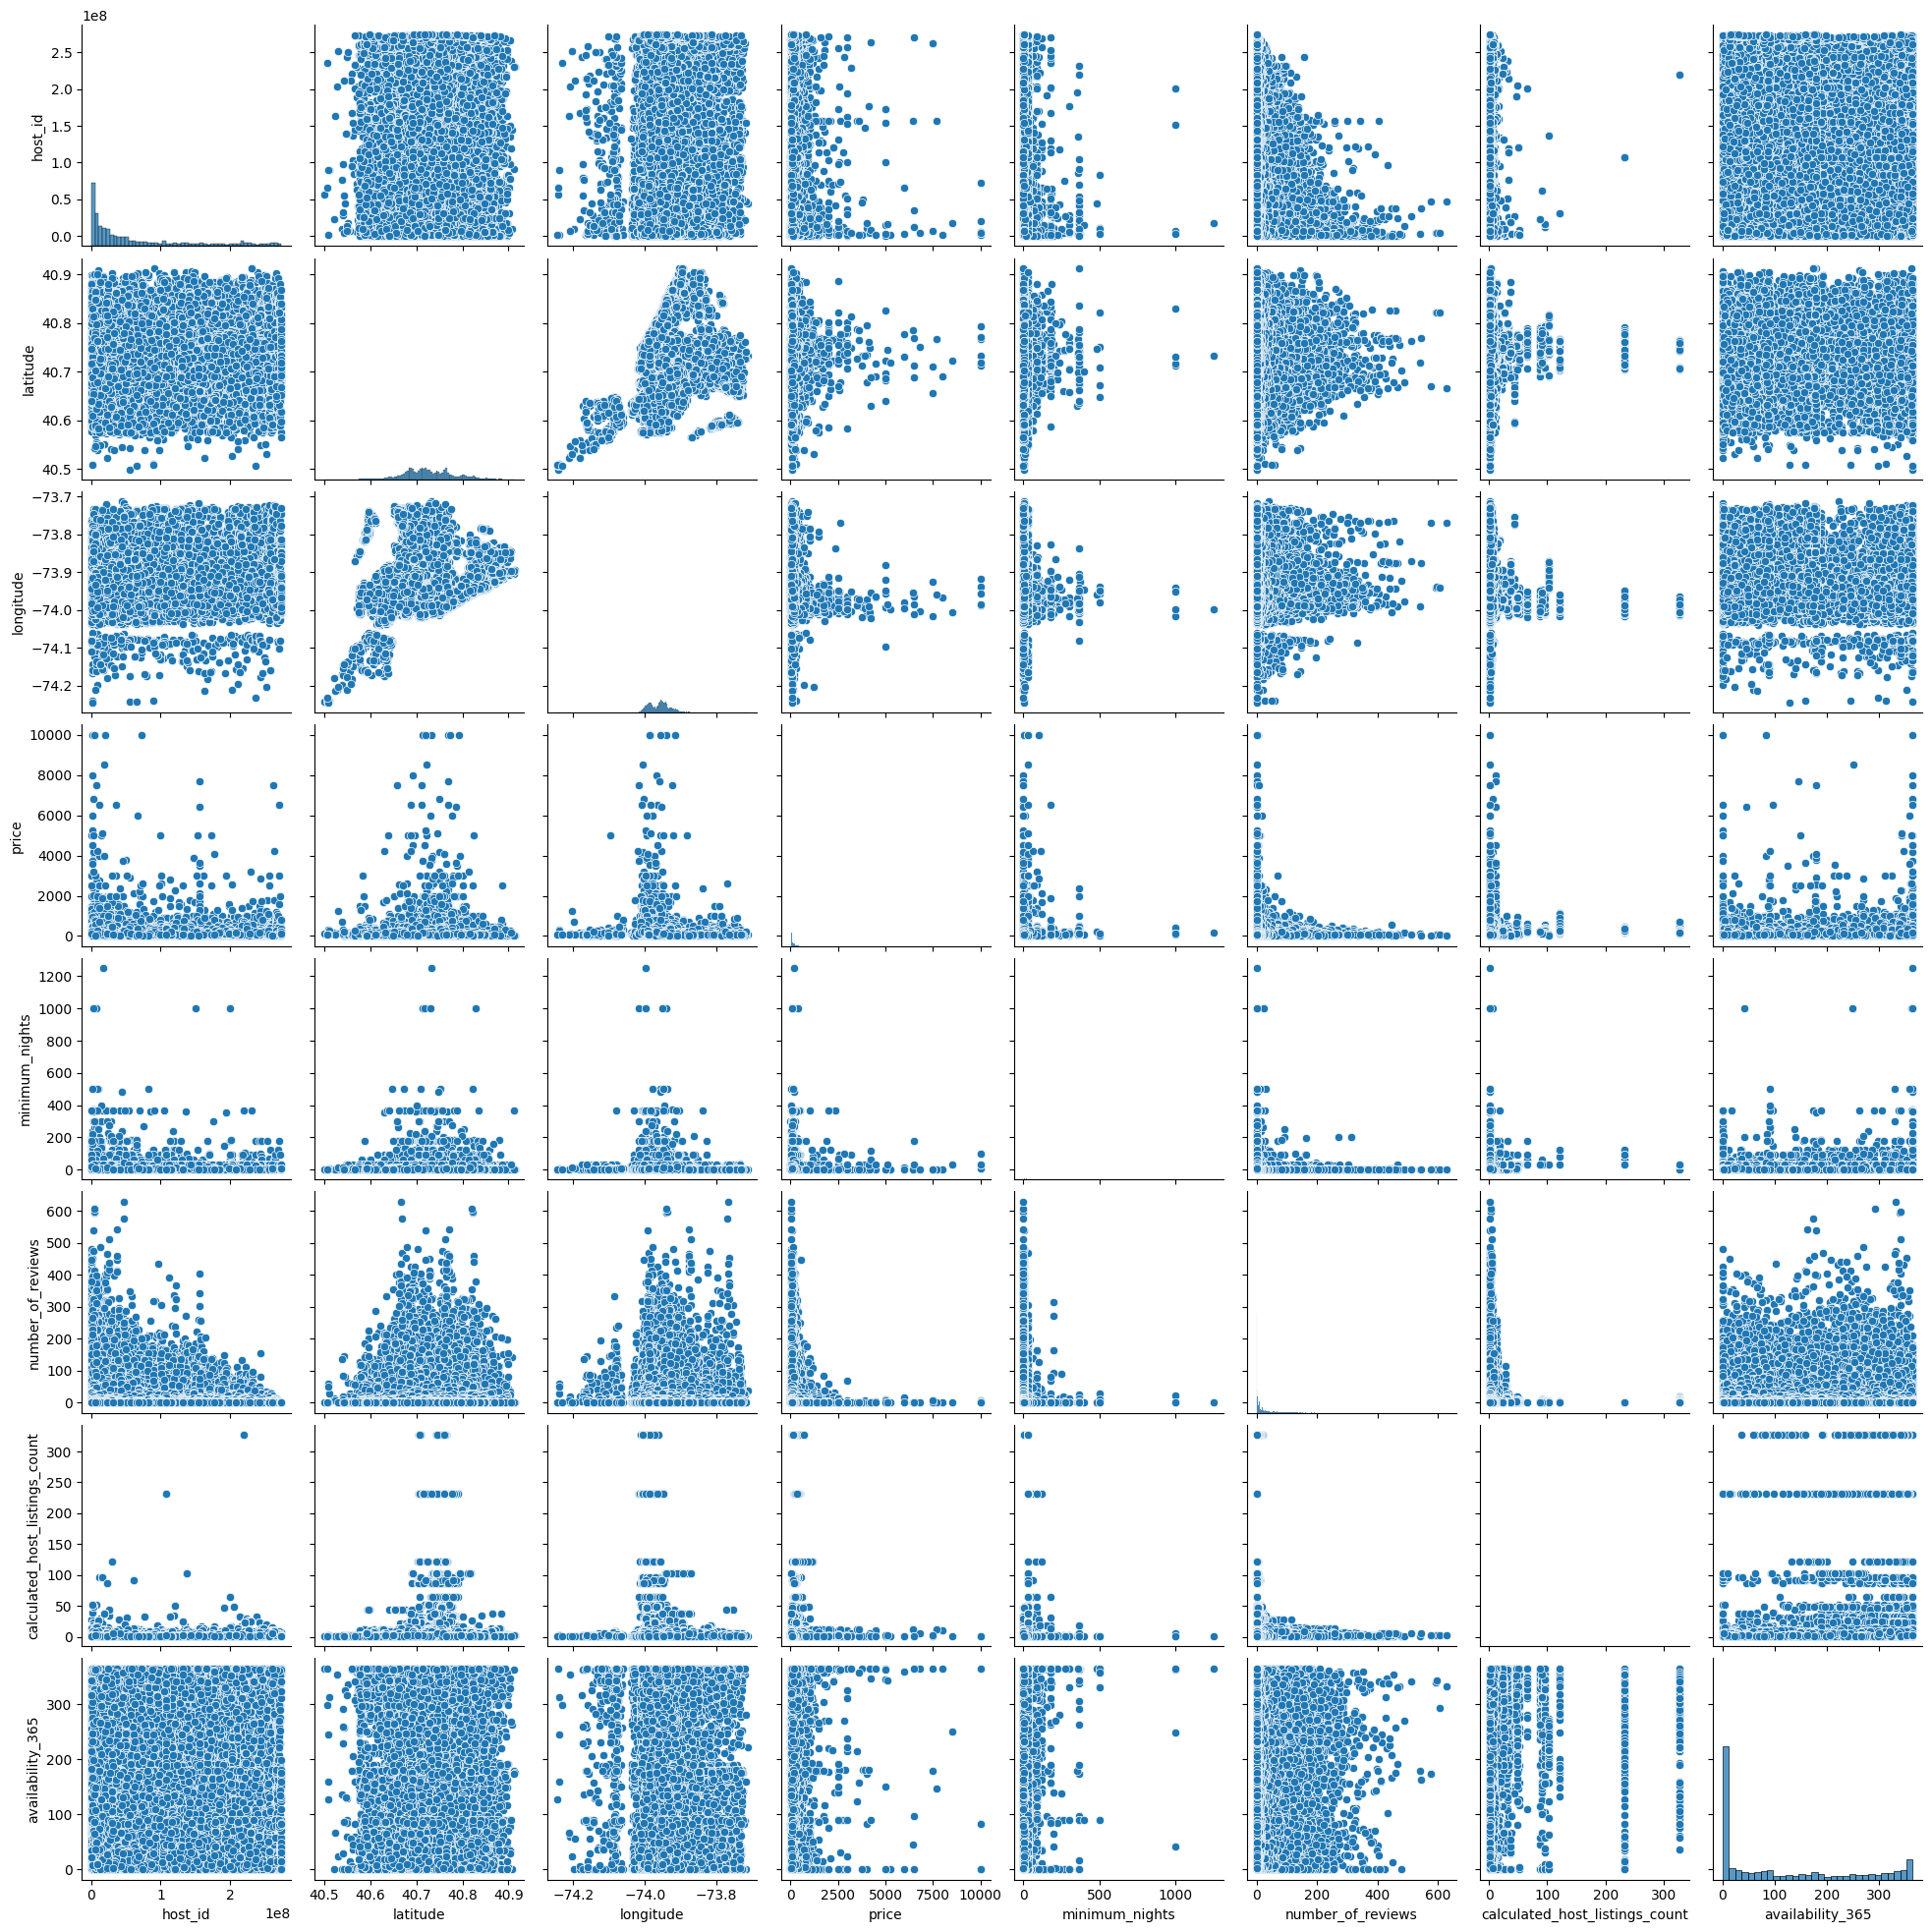

In [55]:
#Análisis de todos los datos a la vez
fig.suptitle("Análisis de todos los datos", fontsize=16)
sns.pairplot(data = total_data)

In [56]:
#Análisis de outliers
df_enc.describe().round()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,neighbourhood_encoded,room_type_encoded
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0
mean,67620011.0,41.0,-74.0,153.0,7.0,23.0,7.0,113.0,1.0,30.0,1.0
std,78610967.0,0.0,0.0,240.0,21.0,45.0,33.0,132.0,1.0,35.0,1.0
min,2438.0,40.0,-74.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,7822033.0,41.0,-74.0,69.0,1.0,1.0,1.0,0.0,0.0,8.0,0.0
50%,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,45.0,1.0,19.0,1.0
75%,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,227.0,1.0,37.0,1.0
max,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,327.0,365.0,4.0,220.0,2.0


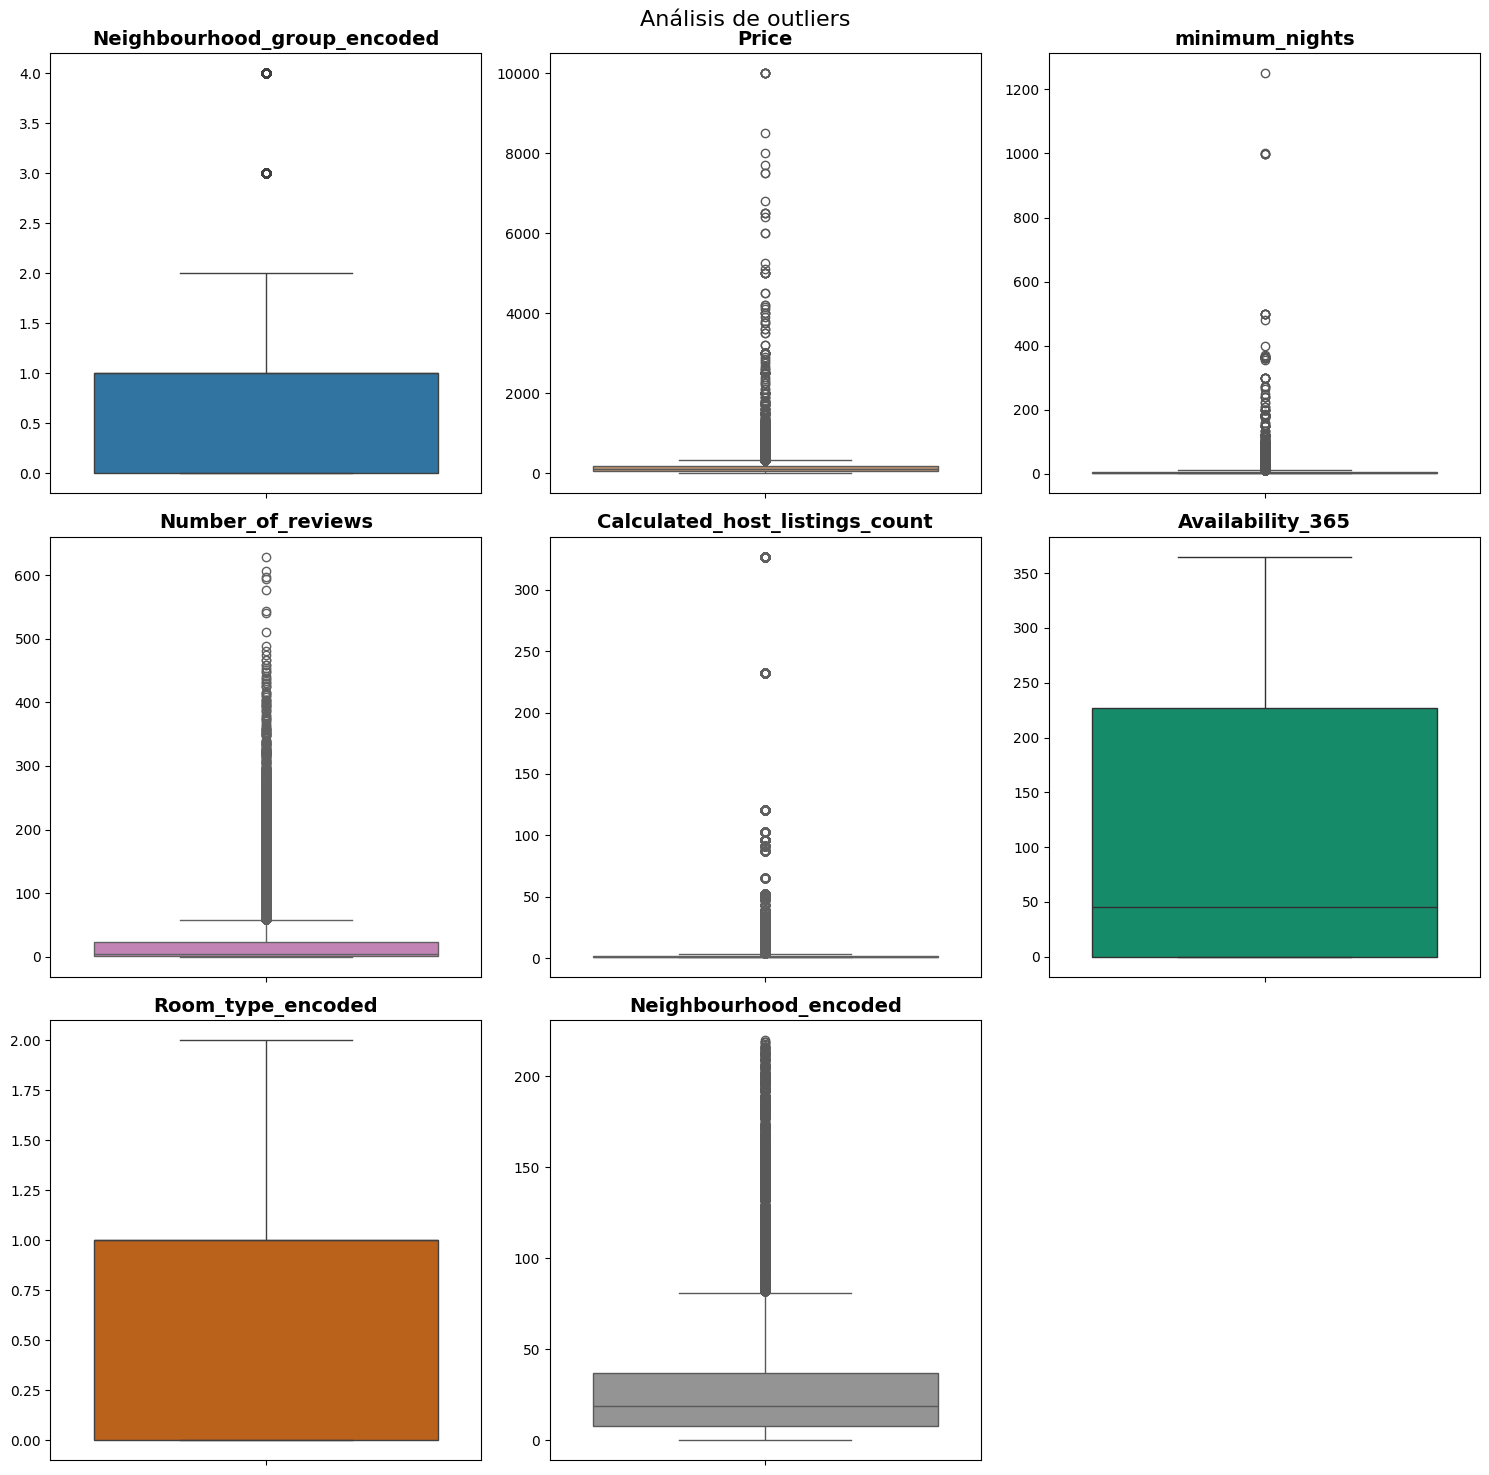

In [57]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "neighbourhood_group_encoded").set_title("Neighbourhood_group_encoded", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "price", color=sns.color_palette("colorblind")[5]).set_title("Price", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "minimum_nights", color=sns.color_palette("colorblind")[8]).set_title("minimum_nights", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "number_of_reviews", color=sns.color_palette("colorblind")[4]).set_title("Number_of_reviews", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "calculated_host_listings_count", color=sns.color_palette("colorblind")[9]).set_title("Calculated_host_listings_count", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "availability_365", color=sns.color_palette("colorblind")[2]).set_title("Availability_365", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 0], data = df_enc, y = "room_type_encoded", color=sns.color_palette("colorblind")[3]).set_title("Room_type_encoded", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 1], data = df_enc, y = "neighbourhood_encoded", color=sns.color_palette("colorblind")[7]).set_title("Neighbourhood_encoded", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

De los gráficos anteriores se puede concluir que en las categorías: number_of_reviews, price, minimum_nights, calculated_host_listing y neighbourhood tienen un número elevado de outliers. 
Esto significa que hay valores que se salen de la media, por lo que hay que tenerlos en cuenta a la hora de sguir con el análisis. 

In [58]:
#Creamos una copia sin outliers
df_enc_no = df_enc.copy()

In [59]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'./enc/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [60]:
df_enc_no['price'] = remove_outliers(df_enc_no['price'], 'price')
df_enc_no['minimum_nights'] = remove_outliers(df_enc_no['minimum_nights'], 'minimum_nights')
df_enc_no['number_of_reviews'] = remove_outliers(df_enc_no['number_of_reviews'], 'number_of_reviews', allow_neg=False)

In [61]:
df_enc.isna().sum()

host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_encoded       0
neighbourhood_encoded             0
room_type_encoded                 0
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [63]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('price', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('price', df_enc_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [64]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'./enc/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [65]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

In [66]:
from sklearn.preprocessing import MinMaxScaler

def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'./enc/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [67]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

In [68]:
from sklearn.feature_selection import f_classif, SelectKBest

def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'./enc/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel  

In [69]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 7, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 7, 'without_outliers')

In [70]:
#Aplicamos el filtro
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

In [71]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [72]:
# Bases de datos de entrenamiento
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Bases de datos de prueba
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)